In [111]:
import pandas as pd

In [112]:
df = pd.read_csv("sales_data_1.csv")

df.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21-08-2023,Vendor6,72.11,Customer7,91.58,44
1,21-08-2023,Vendor4,75.08,Customer7,83.71,17
2,21-08-2023,Vendor7,83.93,Customer2,103.76,15
3,21-08-2023,Vendor7,52.01,Customer3,64.53,7
4,21-08-2023,Vendor2,98.91,Customer5,140.92,1


In [113]:
df.isnull().sum()

Date                0
Firm bought from    0
Buying price        0
Customer            0
Selling price       0
Quantity sold       0
dtype: int64

## 1.What is their overall gross margin for their business?

In [114]:
df['Profit'] = (df['Selling price'] - df['Buying price'])* df['Quantity sold']
overall_gross_margin = df['Profit'].sum()

print("Overall Gross Margin:", overall_gross_margin)

Overall Gross Margin: 31482.749999999996


## 2.Which vendor is the most profitable?

In [115]:
vendor_profit = df.groupby('Firm bought from')['Profit'].sum()

most_profitable_vendor = vendor_profit.idxmax()

print("Most Profitable Vendor:", most_profitable_vendor)


Most Profitable Vendor: Vendor4


## 3.Which customer is the least profitable?

In [116]:
customer_profit = df.groupby('Customer')['Profit'].sum()

least_profitable_customer = customer_profit.idxmin()

print("Least Profitable Customer:", least_profitable_customer)


Least Profitable Customer: Customer3


## 4.Which day of the week was most profitable for them?

In [117]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

df['Day_of_Week'] = df['Date'].dt.dayofweek


day_of_week_profit = df.groupby('Day_of_Week')['Profit'].sum()

most_profitable_day = day_of_week_profit.idxmax()

print("Most Profitable Day of the Week:", most_profitable_day)
print(day_of_week_profit)

Most Profitable Day of the Week: 0
Day_of_Week
0    6847.34
1    3305.35
2    4392.47
3    4866.03
4    3761.94
5    5223.16
6    3086.46
Name: Profit, dtype: float64


## 5.Which day of the week was the least profitable for them?

In [118]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day_of_Week'] = df['Date'].dt.dayofweek

day_of_week_profit = df.groupby('Day_of_Week')['Profit'].sum()

most_profitable_day = day_of_week_profit.idxmin()

print("Least Profitable Day of the Week:", most_profitable_day)
print(day_of_week_profit)


Least Profitable Day of the Week: 6
Day_of_Week
0    6847.34
1    3305.35
2    4392.47
3    4866.03
4    3761.94
5    5223.16
6    3086.46
Name: Profit, dtype: float64


## Quantity Information

## 6.Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv

In [119]:
df=pd.read_csv("sales_data_2.csv")
df.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [120]:
df.isnull().sum()

Date                0
Firm bought from    0
Buying price        0
Quantity bought     0
Customer            0
Selling price       0
Quantity sold       0
dtype: int64

In [121]:
df['Profit'] = (df['Selling price'] - df['Buying price'])*df['Quantity sold']
df['3-Day Avg Profit'] = df['Profit'].rolling(window=3).mean()
df



,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Profit,3-Day Avg Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,856.68,NaN
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,146.71,NaN
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,297.45,433.613333
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,87.64,177.266667
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,42.01,142.366667
...,...,...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18,407.34,552.863333
66,2023-08-27,Vendor8,88.79,14,Customer3,105.59,5,84.00,552.070000
67,2023-08-27,Vendor5,63.30,81,Customer5,92.92,32,947.84,479.726667
68,2023-08-27,Vendor5,94.06,18,Customer5,125.67,4,126.44,386.093333


## 7.Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

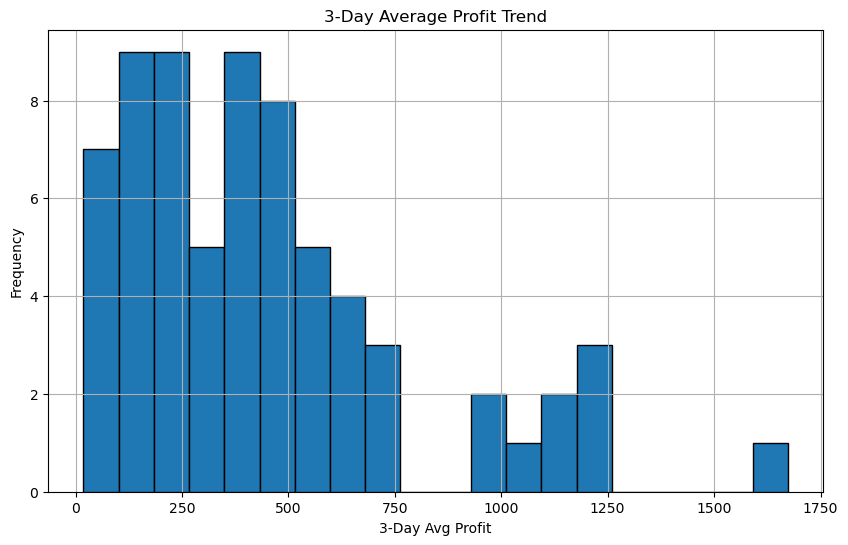

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['3-Day Avg Profit'].dropna(), bins=20, edgecolor='k')
plt.xlabel('3-Day Avg Profit')
plt.ylabel('Frequency')
plt.title('3-Day Average Profit Trend')
plt.grid(True)

## 8.Can you optimize the sales process to ensure gross margin is maximized?

In [123]:
df['Total_Cost'] = df['Buying price'] * df['Quantity sold']
df['Total_Revenue'] = df['Selling price'] * df['Quantity sold']


vendor_totals = df.groupby('Firm bought from')[['Total_Revenue', 'Total_Cost']].sum()

customer_totals = df.groupby('Customer')[['Total_Revenue', 'Total_Cost']].sum()


vendor_totals['Gross_Margin'] = ((vendor_totals['Total_Revenue'] - vendor_totals['Total_Cost']) / vendor_totals['Total_Revenue']) * 100
customer_totals['Gross_Margin'] = ((customer_totals['Total_Revenue'] - customer_totals['Total_Cost']) / customer_totals['Total_Revenue']) * 100


low_vendor_threshold = 20  
low_customer_threshold = 20
low_performing_vendors = vendor_totals[vendor_totals['Gross_Margin'] < low_vendor_threshold]
low_performing_customers = customer_totals[customer_totals['Gross_Margin'] < low_customer_threshold]

print("Low-performing Vendors:")
print(low_performing_vendors)

print("\nLow-performing Customers:")
print(low_performing_customers)

Low-performing Vendors:
                  Total_Revenue  Total_Cost  Gross_Margin
Firm bought from                                         
Vendor2                 6704.47     5407.49     19.345004
Vendor8                 1393.84     1140.10     18.204385

Low-performing Customers:
           Total_Revenue  Total_Cost  Gross_Margin
Customer                                          
Customer7       12340.28    10142.66      17.80851


## 9.To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 

In [124]:
buying_price_percentiles = df['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = df['Selling price'].quantile([0.25, 0.5, 0.75])

print("Buying Price Percentiles (25th, 50th, 75th):", buying_price_percentiles)
print("Selling Price Percentiles (25th, 50th, 75th):", selling_price_percentiles)


Buying Price Percentiles (25th, 50th, 75th): 0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64
Selling Price Percentiles (25th, 50th, 75th): 0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


## 10.Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [125]:
below_25th_buying = len(df[df['Buying price'] < buying_price_percentiles[0.25]])
above_75th_selling = len(df[df['Selling price'] > selling_price_percentiles[0.75]])

print("Number of transactions below 25th percentile for buying price:", below_25th_buying)
print("Number of transactions above 75th percentile for selling price:", above_75th_selling)


Number of transactions below 25th percentile for buying price: 18
Number of transactions above 75th percentile for selling price: 18


## 11.Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 

In [126]:
df['Profit'] = (df['Buying price'] - df['Selling price'])
initial_gross_margin = df['Profit'].sum()
vendor4_data = df[df['Firm bought from'] == 'Vendor 4']
new_gross_margin = initial_gross_margin + vendor4_data['Profit'].sum()
impact_on_gross_margin = new_gross_margin - initial_gross_margin
print("Impact on Gross Margin by Honoring Vendor 4:", impact_on_gross_margin)

Impact on Gross Margin by Honoring Vendor 4: 0.0


## 12.Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)

In [127]:
vendor_profit = df.groupby('Firm bought from')['Profit'].sum()

highest_profit_vendor = vendor_profit.idxmax()

print("Vendor with Highest Gross Margin:", highest_profit_vendor)
vendor_profit

Vendor with Highest Gross Margin: Vendor6


Firm bought from
Vendor1     -53.23
Vendor10    -82.58
Vendor2    -161.11
Vendor3    -165.18
Vendor4    -170.11
Vendor5    -116.98
Vendor6     -32.11
Vendor7    -224.98
Vendor8     -35.66
Vendor9    -165.26
Name: Profit, dtype: float64

## 13.Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down) 

In [128]:
initial_quantity_sold = df['Quantity sold'].sum()
initial_gross_profit = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
print(initial_gross_profit)
initial_gross_profit = initial_gross_profit.sum()
print(initial_gross_profit)

price_change = 1
df['New Selling price'] = df['Selling price'] + price_change
new_quantity_sold = df['Quantity sold'].sum()
new_gross_profit = (df['New Selling price'] - df['Buying price']) * df['Quantity sold']
new_gross_profit = new_gross_profit.sum()
percentage_change_in_quantity = ((new_quantity_sold - initial_quantity_sold) / initial_quantity_sold) * 100
percentage_change_in_price = (price_change / df['Selling price'].mean()) * 100
price_elasticity = percentage_change_in_quantity / percentage_change_in_price
print(f"Price Elasticity: {price_elasticity}")


0     856.68
1     146.71
2     297.45
3      87.64
4      42.01
       ...  
65    407.34
66     84.00
67    947.84
68    126.44
69     25.88
Length: 70, dtype: float64
31482.749999999996
Price Elasticity: 0.0
